Name : DEVSHREE KORANNE
Batch : DATA SCIENCE WITH MACHINE LEARNING AND PYTHON


# Phishing Prediction using Machine Learning

# Importing Python Libraries

In [12]:
!pip install numpy==1.17
!pip install pandas==1.2.3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Loading Data Set 

In [13]:
data = pd.read_csv("Phishing_Legitimate_full.csv")
data.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1



These lines of code are used to convert the data types of columns in a pandas Dataframe to reduce memory usage .

first two lines select columns with datatypes 

in next for loops , each column selected in the previous steps is cast to smaller data type . 
these smaller data types use less memory than their larger counterparts and may be sufficient for storing the values in the data frame

In [14]:
float_cols = data.select_dtypes('float64').columns
for c in float_cols:
    data[c] = data[c].astype('float32')

int_cols = data.select_dtypes('int64').columns
for c in int_cols:
    data[c] = data[c].astype('int32')
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int32  
 1   NumDots                             10000 non-null  int32  
 2   SubdomainLevel                      10000 non-null  int32  
 3   PathLevel                           10000 non-null  int32  
 4   UrlLength                           10000 non-null  int32  
 5   NumDash                             10000 non-null  int32  
 6   NumDashInHostname                   10000 non-null  int32  
 7   AtSymbol                            10000 non-null  int32  
 8   TildeSymbol                         10000 non-null  int32  
 9   NumUnderscore                       10000 non-null  int32  
 10  NumPercent                          10000 non-null  int32  
 11  NumQueryComponents                  10000 

In [15]:
data.shape

(10000, 50)

In [16]:
data.info

<bound method DataFrame.info of          id  NumDots  SubdomainLevel  PathLevel  UrlLength  NumDash  \
0         1        3               1          5         72        0   
1         2        3               1          3        144        0   
2         3        3               1          2         58        0   
3         4        3               1          6         79        1   
4         5        3               0          4         46        0   
...     ...      ...             ...        ...        ...      ...   
9995   9996        3               1          1         50        0   
9996   9997        2               1          4         59        1   
9997   9998        2               1          4         57        0   
9998   9999        3               1          1         49        0   
9999  10000        3               1          2         52        3   

      NumDashInHostname  AtSymbol  TildeSymbol  NumUnderscore  ...  \
0                     0         0            

In [17]:
data.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


The describe() method in Pandas is used to generate descriptive statistics of a DataFrame or a Series. When called on a DataFrame, it will compute and return a summary of statistics for each numeric column in the DataFrame.

In [18]:
data.describe()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,...,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,...,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,2886.89568,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,...,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.00000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2500.75000,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,5000.50000,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,7500.25000,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,...,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,10000.00000,21.000000,14.000000,18.000000,253.000000,55.000000,9.000000,1.000000,1.000000,18.00000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Renaming column name for convenience

In [28]:
data.rename(columns={'CLASS_LABEL':'Label'},inplace=True)

In [20]:
data.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,Label
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


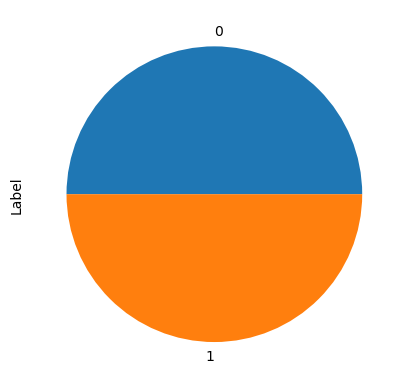

In [21]:
data['Label'].value_counts().plot(kind='pie')

This line of code is used to plot a pie chart of the value counts for each unique value in the 'Label ' column of the given data set.

# Spearman Correlation

The Spearman correlation is a statistical measure that assesses the strength and direction of the association between two variables.

In [37]:
def corr_heatmap(data, idx_s, idx_e):
    y = data['Label']
    temp = data.iloc[:, idx_s:idx_e]
    if 'id' in temp.columns:
        del temp['id']
    temp['Label'] = y
    sns.heatmap(temp.corr(), annot=True, fmt='.3f',cmap='coolwarm')
    plt.show()
     

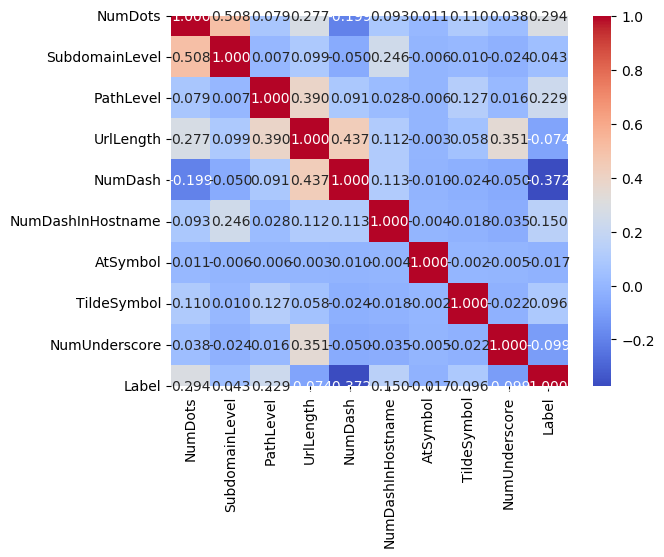

In [38]:
corr_heatmap(data, 0, 10)

From the above heatmap of first 10 columns against Label, we can concluded that none of the features have strong correlation with the labels. But, NumDash has some significant negative effect towards the CLASS_LABEL, which could mean if there is less number of dash then it is more likely to be phising site.


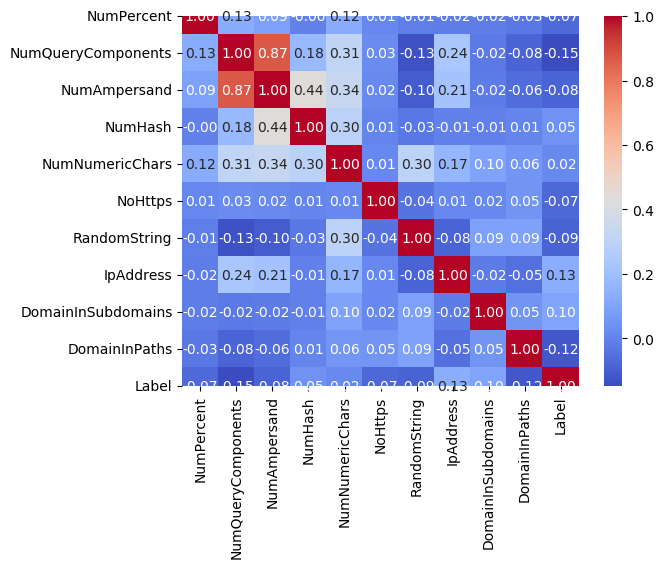

In [33]:

corr_heatmap(data, 10, 20)

From the above heatmap of column no 10 to 20 against Label,we come to know that there is no strong or even medium level strength correlation features with Label

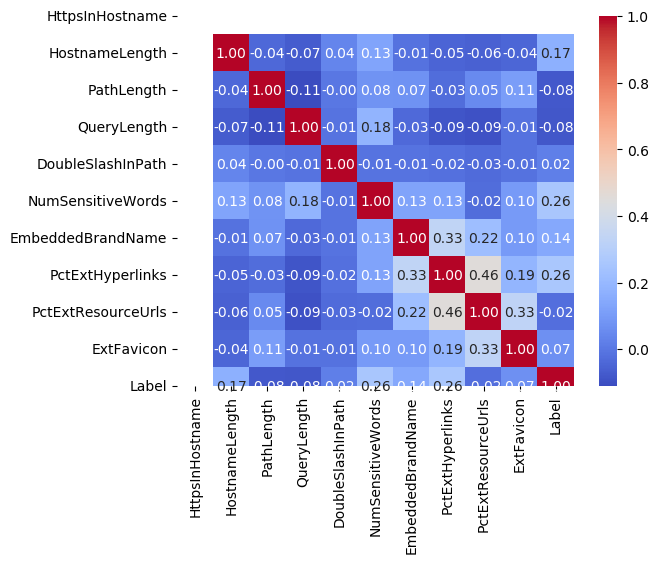

In [34]:

corr_heatmap(data, 20, 30)

From the above heatmap of column no 20 to 30 against Label,we come to know that there is no strong or even medium level strength correlation features with Label

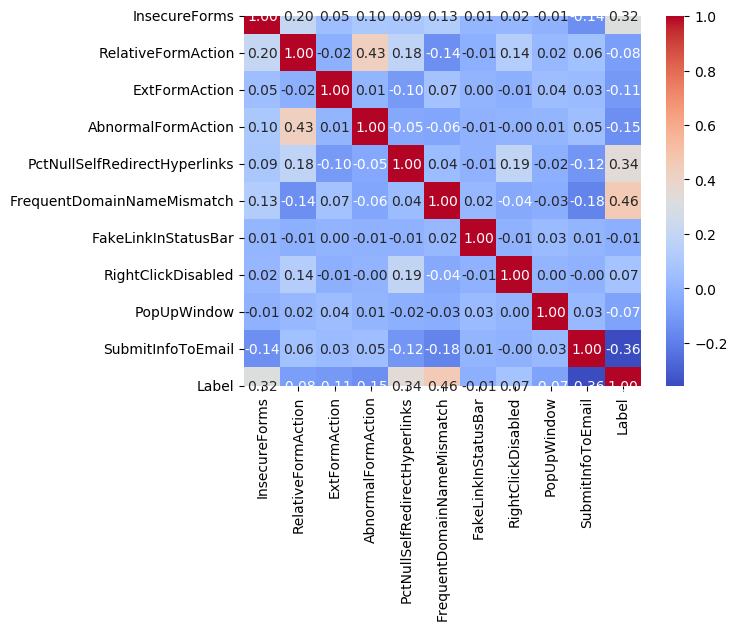

In [35]:

corr_heatmap(data, 30, 40)
     

From the above heatmap of column no 30 to 40 against Label,we come to know that there are few features that are linearly correlated to Label and they are:

1. InsecureForms shows that as the value is higher so the probability of being a phising site

2. PctNullSelfRedirectHyperlinks shows the same positive correlation as InsecureForms

3. FequentDomainNameMismatch shows that it has medium linear correlation in positive direction

4. SubmitInfoToEmail seems to indicate that sites that ask users to submit their details to emails seems to be more high probability for phising

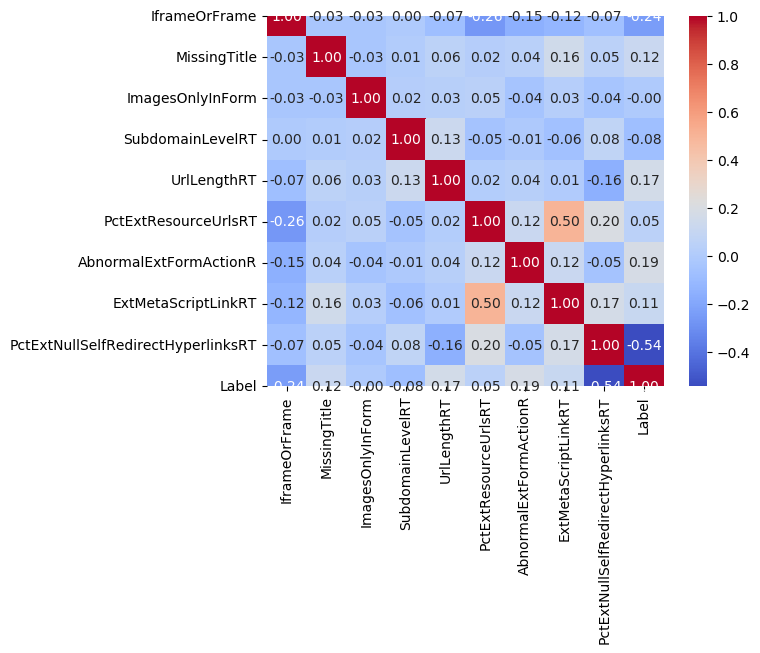

In [36]:
corr_heatmap(data, 40, 50)

From the above heatmap of column no 40 to 50 against Label,we come to know that PctExtNullSelfRedirectHyperlinksRT has corelation with Label and it has negative effect towards labels which could mean that when the number of percent of null self redirect hyperlinks occur hence the probabiliy of phising increases



# Mutual Info Classifier
Mutual information (MI) is a measure of the mutual dependence between two random variables. In the context of machine learning, MI can be used for feature selection, where we aim to identify the most relevant features for a given classification task.

In [12]:
from sklearn.feature_selection import mutual_info_classif

To implement a mutual information classifier, we can use the mutual_info_classif function from the sklearn.feature_selection module in Python. This function takes in the feature matrix and target vector as inputs, and returns an array of MI scores for each feature

In [13]:
x=data.drop(['id','Label'],axis=1)

In [14]:
y=data['Label']

In [15]:
discrete_features = x.dtypes ==int

In [16]:
mi_scores = mutual_info_classif(x, y, discrete_features=discrete_features)
mi_scores = pd.Series(mi_scores, name='MI Scores', index=x.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores

PctExtHyperlinks                      4.694758e-01
PctExtResourceUrls                    2.929801e-01
PctNullSelfRedirectHyperlinks         2.366587e-01
PctExtNullSelfRedirectHyperlinksRT    2.123850e-01
NumNumericChars                       1.326711e-01
FrequentDomainNameMismatch            1.254908e-01
ExtMetaScriptLinkRT                   1.175434e-01
NumDash                               1.140136e-01
SubmitInfoToEmail                     7.802617e-02
NumDots                               6.553700e-02
PathLength                            6.413269e-02
QueryLength                           5.818557e-02
PathLevel                             5.543887e-02
InsecureForms                         5.508096e-02
UrlLength                             5.263855e-02
NumSensitiveWords                     4.180522e-02
NumQueryComponents                    3.361768e-02
PctExtResourceUrlsRT                  2.831059e-02
IframeOrFrame                         2.805496e-02
HostnameLength                 

In [17]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width,scores)
    plt.yticks(width,ticks)
    plt.title("Mi Scores")

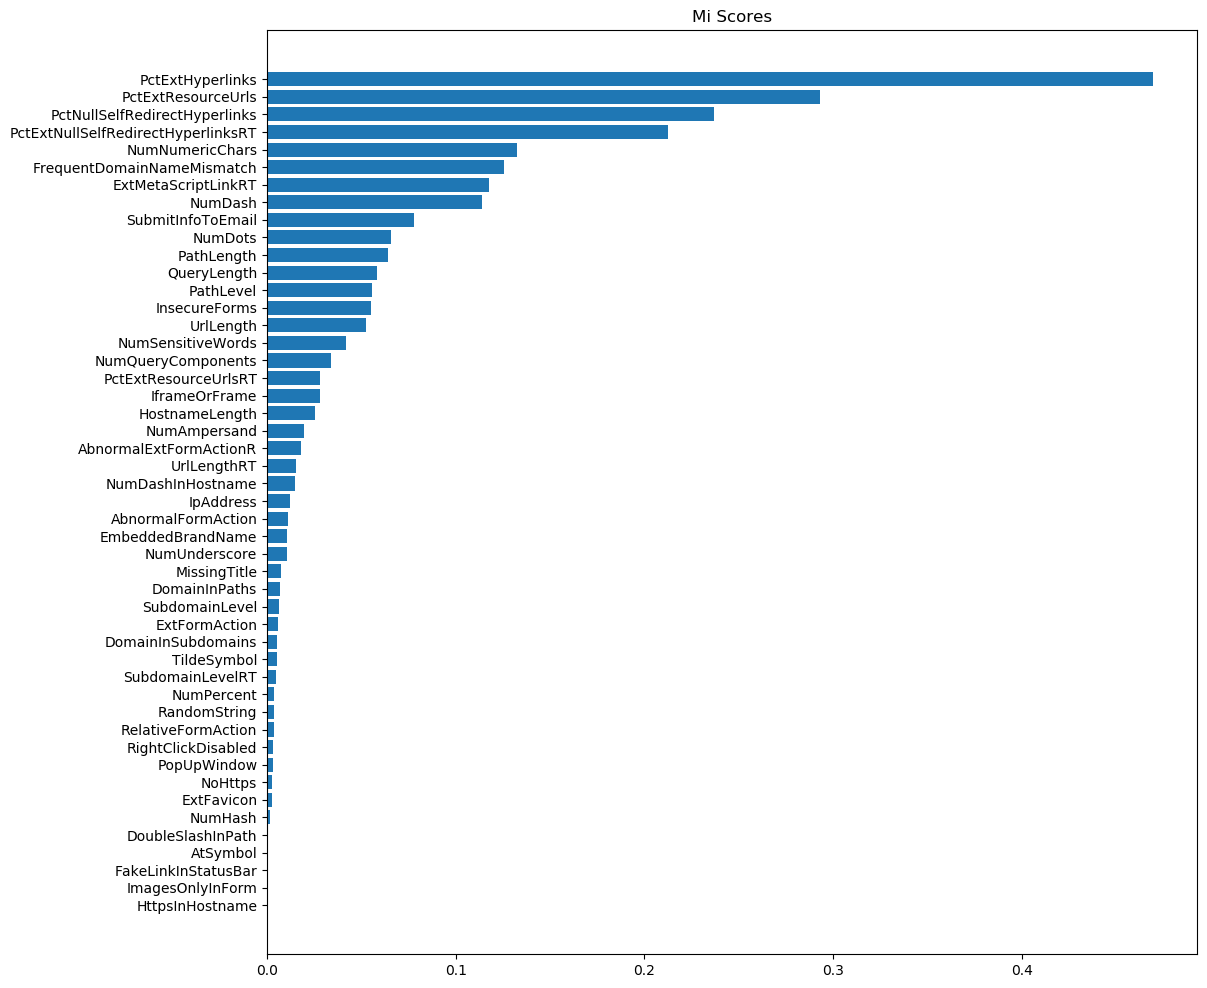

In [18]:
plt.figure(dpi=100, figsize=(12,12))
plot_mi_scores(mi_scores)

# Prediction using Logistic Regression

  
Logistic regression is a statistical model used for binary classification problems, where the goal is to predict a binary output variable (e.g. 0 or 1) based on one or more input variables (also called features or predictors). The model uses a logistic function to map the input features to the probability of the output variable.

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier as Rfc 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Train logistic models

    This method is used to perform a repetative training process using logistic regression model, the main purpose for this is to find the optimal number of features that can be used to find the best fitted model without adjusting much of the hyperparameters, hence the idea here is to go with Data-Centric training, basically the method takes number of top N features to be used for training the model and all the evaluation metrics are returned for evaluation purpose

In [20]:
def train_logistic(data, top_n):
    top_n_features= mi_scores.sort_values(ascending=False).head(top_n).index.tolist()
    x=data[top_n_features]
    y= data['Label']
    
    x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2, shuffle=True)
    
    LR = LogisticRegression(max_iter=10000)
    LR.fit(x_train, y_train)
    
    y_pred= LR.predict(x_test)
    
    precision=precision_score(y_test, y_pred) 
    recall=recall_score(y_test, y_pred)
    f1=f1_score(y_test, y_pred) 
    accuracy=accuracy_score(y_test, y_pred)
    
    return precision, recall,f1,accuracy

In [27]:
arr=[]
for i in range(15,51,1):
    precision,recall,f1,accuracy=train_logistic(data,i)
    print("performance for logistic Model with Top {} features is precision :{}, recall :{}, f1 score :{}, accuracy :{}".format(i,precision,recall,f1,accuracy))
    arr.append([i,precision,recall,f1,accuracy])


performance for logistic Model with Top 15 features is precision :0.898635477582846, recall :0.9266331658291457, f1 score :0.9124195942602672, accuracy :0.9115
performance for logistic Model with Top 16 features is precision :0.9205103042198234, recall :0.9268774703557312, f1 score :0.9236829148202855, accuracy :0.9225
performance for logistic Model with Top 17 features is precision :0.9287833827893175, recall :0.9205882352941176, f1 score :0.9246676514032495, accuracy :0.9235
performance for logistic Model with Top 18 features is precision :0.9279454722492697, recall :0.918111753371869, f1 score :0.9230024213075061, accuracy :0.9205
performance for logistic Model with Top 19 features is precision :0.9038272816486752, recall :0.9369277721261444, f1 score :0.92007992007992, accuracy :0.92
performance for logistic Model with Top 20 features is precision :0.8978388998035364, recall :0.9355168884339816, f1 score :0.9162907268170427, accuracy :0.9165
performance for logistic Model with Top 

Here the loop will be starting from 20 as we will start training with top 20 features up to all 50 features to find optimal number of features needed for this problem

In [29]:
df = pd.DataFrame(arr,columns=['num_of_features','precision','recall','f1_score','accuracy'])
df

,num_of_features,precision,recall,f1_score,accuracy
0,15,0.898635,0.926633,0.912420,0.9115
1,16,0.920510,0.926877,0.923683,0.9225
2,17,0.928783,0.920588,0.924668,0.9235
3,18,0.927945,0.918112,0.923002,0.9205
4,19,0.903827,0.936928,0.920080,0.9200
5,20,0.897839,0.935517,0.916291,0.9165
6,21,0.923762,0.930209,0.926975,0.9265
7,22,0.916008,0.933535,0.924688,0.9245
8,23,0.923375,0.939783,0.931507,0.9300
9,24,0.925024,0.940594,0.932744,0.9315


Visualize Logistic Reg Performance
    
As we can see, the model had ups and downs during the training as more number of features were added, as our target is to maximize all the metrics we have to find the number of features that gives us the best of all metrics, from the figure below, we can see that recall is constantly performing good but our model tend to have problem with precision score, hence to choose the best N of features, we have to pick the area where all the metrics are performing and based on the figure I would say its around 39 features

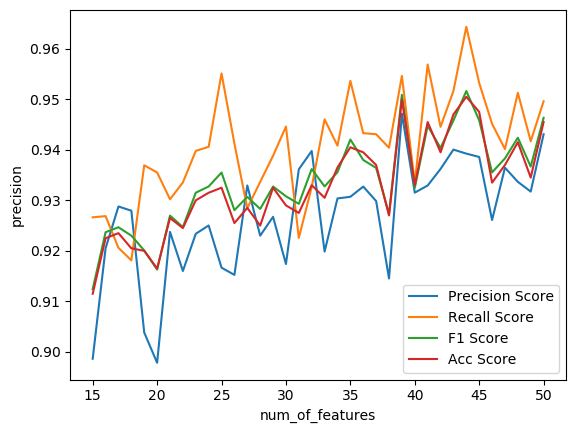

In [30]:
sns.lineplot(x='num_of_features', y='precision', data=df, label='Precision Score') 
sns.lineplot(x='num_of_features', y='recall', data=df, label='Recall Score') 
sns.lineplot(x='num_of_features', y='f1_score', data=df, label='F1 Score')
sns.lineplot(x='num_of_features', y='accuracy', data=df, label='Acc Score')

As we can see, the model had ups and downs during the training as more number of features were added, as our target is to maximize all the metrics we have to find the number of features that gives us the best of all metrics, from the figure below, we can see that recall is constantly performing good but our model tend to have problem with precision score, hence to choose the best N of features, we have to pick the area where all the metrics are performing and based on the figure I would say its around 39 features

# Random Forest Classifier


A Random Forest classifier is a popular machine learning algorithm used for classification tasks. It is an ensemble method that combines multiple decision trees, where each decision tree is trained on a subset of the data and a random subset of the features.

In [38]:
def train_rfc(data, top_n):
    top_n_features = mi_scores.sort_values(ascending=False).head(top_n).index.tolist()
    X=data[top_n_features]
    у=data['Label']

    x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, shuffle=True)

    rfc= Rfc(n_estimators=500,
             max_depth=32, 
             max_features=1.0, 
            )

    rfc.fit(x_train, y_train)

    y_pred = rfc.predict(x_test)

    precision = precision_score(y_test, y_pred) 
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred) 
    accuracy = accuracy_score(y_test, y_pred)

    return precision, recall,f1,accuracy

It is the same method as logistic reggression, the only difference is that we are now using random forest classifier for training and trying to beat the logistic regression baseline



In [40]:
arr=[]
for i in range(15,51,1):
    precision,recall,f1,accuracy=train_rfc(data,i)
    print("performance for logistic Model with Top {} features is precision :{}, recall :{}, f1 score :{}, accuracy :{}".format(i,precision,recall,f1,accuracy))
    arr.append([i,precision,recall,f1,accuracy])

performance for logistic Model with Top 15 features is precision :0.9763779527559056, recall :0.9792694965449161, f1 score :0.9778215869886644, accuracy :0.9775
performance for logistic Model with Top 16 features is precision :0.9738955823293173, recall :0.9748743718592965, f1 score :0.9743847312908086, accuracy :0.9745
performance for logistic Model with Top 17 features is precision :0.9761904761904762, recall :0.973293768545994, f1 score :0.974739970282318, accuracy :0.9745
performance for logistic Model with Top 18 features is precision :0.9735772357723578, recall :0.9706180344478217, f1 score :0.9720953830542871, accuracy :0.9725
performance for logistic Model with Top 19 features is precision :0.9780439121756487, recall :0.9790209790209791, f1 score :0.9785322016974539, accuracy :0.9785
performance for logistic Model with Top 20 features is precision :0.9665653495440729, recall :0.9626639757820383, f1 score :0.9646107178968656, accuracy :0.965
performance for logistic Model with T

In [31]:
df = pd.DataFrame(arr,columns=['num_of_features','precision','recall','f1_score','accuracy'])
df

,num_of_features,precision,recall,f1_score,accuracy
0,15,0.898635,0.926633,0.912420,0.9115
1,16,0.920510,0.926877,0.923683,0.9225
2,17,0.928783,0.920588,0.924668,0.9235
3,18,0.927945,0.918112,0.923002,0.9205
4,19,0.903827,0.936928,0.920080,0.9200
5,20,0.897839,0.935517,0.916291,0.9165
6,21,0.923762,0.930209,0.926975,0.9265
7,22,0.916008,0.933535,0.924688,0.9245
8,23,0.923375,0.939783,0.931507,0.9300
9,24,0.925024,0.940594,0.932744,0.9315


Visualizing Random Forest Performance

    Our goal is to beat logistic regression baseline which is 
    ACCURACY: 0.948869
    PRECISION: 0.947937
    RECALL: 0.948403
    F1_SCORE: 0.9475
    
    According to logistic regression best number of features for this model would be 44.	 			

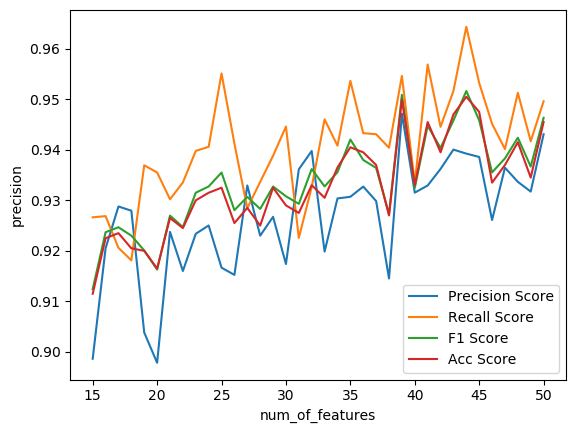

In [32]:
sns.lineplot(x='num_of_features', y='precision', data=df, label='Precision Score') 
sns.lineplot(x='num_of_features', y='recall', data=df, label='Recall Score') 
sns.lineplot(x='num_of_features', y='f1_score', data=df, label='F1 Score')
sns.lineplot(x='num_of_features', y='accuracy', data=df, label='Acc Score')

As we can see, the model had ups and downs during the training as more number of features were added, as our target is to maximize all the metrics we have to find the number of features that gives us the best of all metrics, from the figure below, we can see that recall is constantly performing good but our model tend to have problem with precision score, hence to choose the best N of features, we have to pick the area where all the metrics are performing and based on the figure I would say its around 32 features

Now let's train the final random forest model based on the optimal N number of features.

# Final Random Forest Model


 Lets train the final random forest model based on the optimal N number of features

In [33]:
top_n_features = mi_scores.sort_values(ascending=False).head(27).index.tolist()
x = data[top_n_features]
y = data['Label']

x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2, shuffle=True)

rfc= Rfc(n_estimators=500,
         max_depth=32,
         max_features=1.0,
        )

rfc.fit(x_train, y_train)

y_pred = rfc.predict(x_test,)

precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred) 
accuracy = accuracy_score(y_test,y_pred)

print("performance for logistic Model with Top {} features is precision :{}, recall :{}, f1 score :{}, accuracy :{}".format(27,precision,recall,f1,accuracy))

performance for logistic Model with Top 27 features is precision :0.9733727810650887, recall :0.9772277227722772, f1 score :0.9752964426877471, accuracy :0.975


# Performance

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       990
           1       0.97      0.98      0.98      1010

    accuracy                           0.97      2000
   macro avg       0.98      0.97      0.97      2000
weighted avg       0.98      0.97      0.97      2000



The model is capable of predicting at up to 98% accuracy and also precision and recall , this shows the model has high confidence in predicting phishing and non phishing site.